(DrawingGraphs)=
# Drawing Graphs

>*Above all else show the data.*
>
>--Edward Tufte[^note1]

Visualising data is one of the most important tasks facing the data analyst. It's important for two distinct but closely related reasons. Firstly, there's the matter of drawing "presentation graphics": displaying your data in a clean, visually appealing fashion makes it easier for your reader to understand what you're trying to tell them. Equally important, perhaps even more important, is the fact that drawing graphs helps *you* to understand the data. To that end, it's important to draw "exploratory graphics" that help you learn about the data as you go about analysing it. These points might seem pretty obvious, but I cannot count the number of times I've seen people forget them.

[^note1]: The origin of this quote is Tufte's lovely book *The Visual Display of Quantitative Information*.

```{figure} ../img/graphics/snow_ghost_map2.png
:name: fig-ghostmap
:width: 600px
:align: center

A stylised redrawing of John Snow’s original cholera map. Each small dot represents the location of a cholera case, and each large circle shows the location of a well. As the plot makes clear, the cholera outbreak is centred very closely on the Broad St pump.

```

To give a sense of the importance of this chapter, I want to start with a classic illustration of just how powerful a good graph can be. To that end, {numref}`fig-ghostmap` shows a redrawing of one of the most famous data visualisations of all time: John Snow's 1854 map of cholera deaths. The map is elegant in its simplicity. In the background we have a street map, which helps orient the viewer. Over the top, we see a large number of small dots, each one representing the location of a cholera case. The larger symbols show the location of water pumps, labelled by name. Even the most casual inspection of the graph makes it very clear that the source of the outbreak is almost certainly the Broad Street pump. Upon viewing this graph, Dr Snow arranged to have the handle removed from the pump, ending the outbreak that had killed over 500 people. Such is the power of a good data visualisation.

The goals in this chapter are twofold: firstly, to discuss several fairly standard graphs that we use a lot when analysing and presenting data, and secondly, to show you how to create these graphs in Python. The graphs themselves tend to be pretty straightforward, so in that respect this chapter is pretty simple. Where people usually struggle is learning how to produce graphs, and especially, learning how to produce good graphs.[^note2] Fortunately, learning how to draw graphs in Python is reasonably simple, as long as you're not too picky about what your graph looks like. What I mean when I say this is that Python has a lot of good graphing functions, and most of the time you can produce a clean, high-quality graphic without having to learn very much about the low-level details of how Python handles graphics. Unfortunately, on those occasions when you do want to do something non-standard, or if you need to make highly specific changes to the figure, you actually do need to learn a fair bit about these details; and those details are both complicated and boring. With that in mind, the structure of this chapter is as follows: I'll start out by giving you a very quick overview of how graphics work in Python. I'll then discuss several different kinds of graph and how to draw them, as well as showing the basics of how to customise these plots. In a future version of this book, I intend to finish this chapter off by talking about what makes a good or a bad graph, but I haven't yet had the time to write that section.

[^note2]: I should add that this isn't unique to Python. Like everything in Python, there's a pretty steep learning curve to learning how to draw graphs, and like always there's a massive payoff at the end in terms of the quality of what you can produce. But to be honest, I've seen the same problems show up regardless of what system people use. I suspect that the hardest thing to do is to force yourself to take the time to think deeply about what your graphs are doing. I say that in full knowledge that only about half of my graphs turn out as well as they ought to. Understanding what makes a good graph is easy: actually designing a good graph is *hard*.

(graphics)=

## An overview of Python graphics

Reduced to its simplest form, you can think of a Python graphic as being much like a painting. You start out with an empty canvas. Every time you use a graphics function, it paints some new things onto your canvas. Later on, you can paint more things over the top if you want; but just like painting, you can't "undo" your strokes. If you make a mistake, you have to throw away your painting and start over. Fortunately, this is way more easy to do when using Python than it is when painting a picture in real life: you delete the plot and then type a new set of commands.[^note3] This way of thinking about drawing graphs is referred to as the **_painter's model_**. So far, this probably doesn't sound particularly complicated, and for the vast majority of graphs you'll want to draw it's exactly as simple as it sounds. Much like painting in real life, the headaches usually start when we dig into details. To see why, I'll  expand this "painting metaphor" a bit further just to show you the basics of what's going on under the hood, but before I do I want to stress that you really don't need to understand all these complexities in order to draw graphs. I'd been using Python for years before I even realised that most of these issues existed! However, I don't want you to go through the same pain I went through every time I inadvertently discovered one of these things, so here's a quick overview.

When you paint a picture, you need to paint it **with** something. Maybe you want to do an oil painting, but maybe you want to use watercolour. And, generally speaking, you pretty much have to pick one or the other. The analog to this in Python is a plotting library. A plotting library is a collection of commands about what to draw and where to draw it. In scientific plotting in Python, this usually comes down to something called [_matplotlib_](https://matplotlib.org). `Matplotlib` is a very powerful collection of paints and brushes that allows you to be quite creative and make some lovely and customized figures, but it can be a real pain to work with at times. Fortunately, there are ways to ease the pain. In this book, we will mostly produce figures with the library [_seaborn_](https://seaborn.pydata.org), whose purpose is to make it easier to produce statistical figures with `matplotlib`. `Seaborn` greatly simplifies the process of data visualization in Python, and this is why we will rely on it so heavily. `Seaborn`'s simplicity is both its strength and its weakness, however, and sooner or later, you will probably need to dip into `matplotlib` to make your painting just the way you want it. Luckily for us, because `seaborn` is built on top of `matplotlib`, using one doesn't rule out the other. In keeping with our painting analogy, perhaps we can think of `seaborn` a bit like a stencil, that lets us quickly make a nice image. But there's nothing to stop us from coloring outside the lines if we want to.

Thirdly, a painting is usually done in a particular **style**. Maybe it's a still life, maybe it's an impressionist piece, or maybe you're trying to annoy me by pretending that cubism is a legitimate artistic style. Regardless, each artistic style imposes some overarching aesthetic and perhaps even constraints on what can (or should) be painted using that style. `Seaborn` has an opinion about how plots should look, and how they should be created; it has a nice, clean style that I personally like, but it definitely is a style.

At this point, I think we've covered more than enough background material. The point that I'm trying to make by providing this discussion isn't to scare you with all these horrible details, but rather to try to convey to you the fact that Python doesn't really provide a single coherent graphics system. Instead, Python itself provides a platform, and different people have built different graphical tools using that platform. As a consequence of this fact, there's (once again!) many different ways to achieve the goal of drawing graphs with Python. At this stage you don't need to understand these complexities, but it's useful to know that they're there. For now, I think we can be happy with a simpler view of things: to the extent possible, we'll draw pictures using `seaborn`, and dip into `matplotlib` as needed.

So let's start painting.

[^note3]: Of course, if you are using something like a Jupyter notebook to write your code (and you are doing that, right?), this is even easier, since all you have to do is edit your script and then run it again.


(introplotting)=

## An introduction to plotting

Before I discuss any specialised graphics, let's start by drawing a few very simple graphs just to get a feel for what it's like to draw pictures using Python and `seaborn`. To that end, let's start by importing `seaborn`, and create a small list called `Fibonacci` that contains a few numbers we'd like Python to draw for us. The customary abbreviation for `seaborn` is `sns`, so let's use that. We'll use our list `Fibonacci` to provide the values for the y-axis, but of course, we'll need something for the x-axis as well. Since `Fibonacci` contains 7 digits, we'll create another list, `x`, which has increasing integers from 1 to 7. Then we'll use `seaborn` to plot the x and y axes against each other:

<AxesSubplot:>

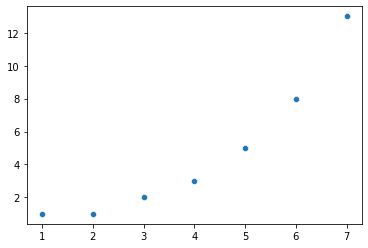

In [60]:
import seaborn as sns
fibonacci = [1,1,2,3,5,8,13]
x = [1,2,3,4,5,6,7]
sns.scatterplot(x = x, y = fibonacci)

### A little color

Already, we can see `seaborn`'s opinion expressing itself in a variety of subtle ways. For example, it has chosen a size and color for the points in the scatterplot. These seem a little small to me, and while blue is a great color, I am partial to orange. So..

<AxesSubplot:>

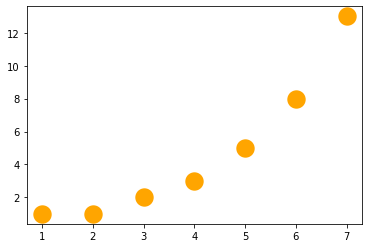

In [61]:
sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')

### Title and axis labels

This is great, but a good figure should have a title, and axis labels. You would think this was straightforward. After all, shouldn't all figures have these things by default? After all, we're not making [Bezos charts](https://twitter.com/jsnell/status/481863414180896769) here, right? It's not quite as easy as you'd expect, but it's not so bad, either. The easiest way to add titles and labels to your figure is to first put your figure into a variable, and then `set` the title and axis labels of that variable. Sounds complicated, but it's ok, once you get used to it. By convention, the variable for storing the figure is called `ax`.[^note4]

Once the figure is safely stored inside of `ax`[^note5], we can use `.set` to set the title and axis labels:

[^note4]: `ax` for "axis", I assume. I think this name harkens back to a different programming language, MATLAB, which inspired `pyplot`, which is part of `matplotlib`, which is... well, anyway... it's often called `ax`, ok?

[^note5]: Actually, you can also apply `set` directly to the initial command creating the figure, like this: `sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange').set(title = 'My first plot', xlabel = 'My x-axis', ylabel='My y-axis')` but most of the time when preparing a figure it is useful to store it as a variable, so you might as well get in the habit now.

[Text(0.5, 1.0, 'My first plot'),
 Text(0.5, 0, 'My x-axis'),
 Text(0, 0.5, 'My y-axis')]

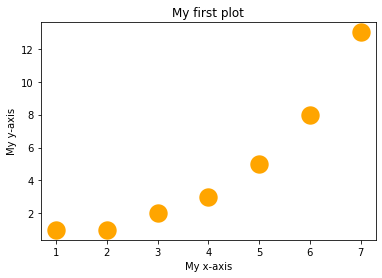

In [72]:
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', xlabel = 'My x-axis', ylabel='My y-axis')

### Font size and related matters

Now that we have a title and axis labels, it would be nice to change the size of the text. At least, my weak eyes wouldn't mind bumping it up a little bit. As always, there is more than one way to do this, but a simple approach is to use what `seaborn` calls "contexts". Remember, `seaborn` is all about providing a quick way to make an attractive graph without messing around too much with `matplotlib`. So while you _can_ dive in and set everything manually, using the `matplotlib` guts that `seaborn` tidly covers over, the `seaborn` way is to just to just say "Hey, I want to make a plot for my presentation, please make it look ok." This is what `context` does. With the `context` command, you tell `seaborn` if your figure is going to remain in a jupyter notebook, or whether it is for some other purpose. Your options are: "paper", "notebook", "talk", and "poster". You can then supply `seaborn` with a `font_scale`, which is basically a number telling `seaborn` how much larger than the default font size (1) you would like your text to be. `seaborn` then adjusts things and tries to make it work.

An important side-note on context: if you are working in jupyter notebook like the one I am writing this book in, once you set the `seaborn` context, it will continue to use that context within the notebook, unless you change it. This could be good or bad, depending on what you want, but it is worth keeping in mind, if you plots don't look like you expect.

[Text(0.5, 1.0, 'My first plot'),
 Text(0.5, 0, 'My x-axis'),
 Text(0, 0.5, 'My y-axis')]

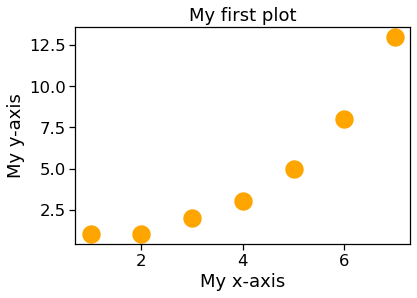

In [89]:
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', 
       xlabel = 'My x-axis', 
       ylabel='My y-axis')

Notice that not only did `seaborn` change the font size for the title and labels, but it also increased the size of the tick-marks on the axes, and changed the size of the numbers on the axes as well, with the added consequence that while we used to have numbers from one to seven on the x-axis, we now only have numbers 2, 4, and 6. `seaborn` has opinions about what looks good, remember, and its opinions might or might now suit your needs. Most of the time, `seaborn` will make reasonable decisions, and will make you a decent-looking plot, but you do need to keep an eye on what it is up to. Luckily, if it makes a choice that you don't like, you can always dip down into `matplotlib` and touch things up to get them just the way you want. Going through all the options in `matplotlib` is beyond the scope of this book though, and there are many good resources out there to help you; mostly if you run into a problem, you just need to do some internet searching, and you will find someone who had a similar problem, and received good (and possibly contradictory!) advice on sites like [stackoverflow](https://stackoverflow.com). Sooner or later, this is where all coders end up in their search for answers to coding problems. Goodness knows this Python translation of Learning Statistics with R would never have happened without copious consulation of stackoverflow and similar sites.

### Open the box

`seaborn` has quite more customization options that you will probably want to know about, but many of them are more applicable to more complex figures, so I'll wait to mention them until later. For now, though, I just want to show you one more option: removing the top and right lines of the box that `seaborn` draws around the data. To me, these make the data feel cramped, and I'd rather give them room to breathe and flourish. So I like to use the `despine` command to remove these, and give the data a little elbow room. `seaborn` has its opinions, and I have mine!

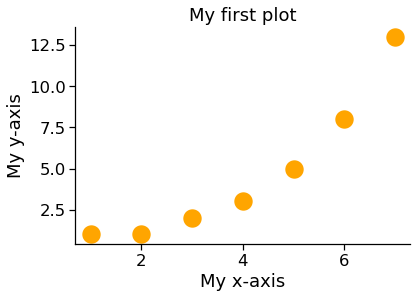

In [119]:
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', 
       xlabel = 'My x-axis', 
       ylabel='My y-axis')
sns.despine(top = True, right = True)

## Plotting more complex data

At this point, we have seen how to make a fairly attractive plot (if I may say so myself) using `seaborn`. However, ususally the data we want to plot are more complicated than this simple series of numbers. `seaborn` has many good options for plotting complex data, but it is happiest if those data are stored in a structured format called a "dataframe". We talked about dataframes back in the chapter called [More Python concepts](mechanics) and will meet them again and again throughout this book. A dataframe is a kind of structured data with columns and rows, just a like a spreadsheet, and having your data organized in a dataframe will make working with `seaborn` much easier. We'll use `pandas` to organize our data in dataframes. So, let's grab some data, put it in a dataframe, and talk more seriously about some real life graphics that you'll want to draw.

You can read more about importing data from a .csv file [here](loadingcsv). The key line in the code below is `afl_margins = pd.read_csv('afl_margins.csv')`. The rest is just a convenience for me in writing this book. If you put the full path to your data between the quotation marks, you should be alright without the rest.

In [158]:
import os
import pandas as pd
from pathlib import Path

cwd = os.getcwd()
os.chdir(str(Path(cwd).parents[0]) + '/Data')

afl_margins = pd.read_csv('afl_margins.csv')

Just to remind ourselves what the data look like, we can use `head` to take a peek:

In [104]:
afl_margins.head()

,afl.margins
0,56
1,31
2,56
3,8
4,32


(histograms)=
### Histograms

We can begin with the humble **_histogram_**. Histograms are one of the simplest and most useful ways of visualising data. They make most sense when you have an interval or ratio scale (e.g., the `afl_margins` data from the chapter on [descriptive statistics](descriptives)) and what you want to do is get an overall impression of the data. Most of you probably know how histograms work, since they're so widely used, but for the sake of completeness I'll describe them. All you do is divide up the possible values into **_bins_**, and then count the number of observations that fall within each bin. This count is referred to as the frequency of the bin, and is displayed as a bar: in the AFL winning margins data, there are 33 games in which the winning margin was less than 10 points, and it is this fact that is represented by the height of the leftmost bar in the figure below. Drawing this histogram with `seaborn` is pretty straightforward. The function you need to use is called `histplot`, and it has pretty reasonable default settings.

By the way, I am going to change the `seaborn` context back to the default settings here, so that my figures will look as consistent as possible with yours, if you are following along at home.

<AxesSubplot:xlabel='afl.margins', ylabel='Count'>

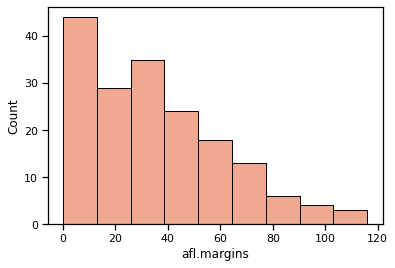

In [126]:
import seaborn as sns
sns.set_context("notebook", font_scale = 1)
sns.histplot(data = afl_margins, x="afl.margins")

Although this image would need some cleaning up in order to make a good presentation graphic (i.e., one you'd include in a report), it nevertheless does a pretty good job of describing the data. In fact, the big strength of a histogram is that (properly used) it does show the entire spread of the data, so you can get a pretty good sense about what it looks like. The downside to histograms is that they aren't very compact: unlike some of the other plots I'll talk about it's hard to cram 20-30 histograms into a single image without overwhelming the viewer. And of course, if your data are nominal scale (e.g., the `afl_finalists` data) then histograms are useless.


The main subtlety that you need to be aware of when drawing histograms is determining where the "breaks" that separate bins should be located, and (relatedly) how many bins there should be. In the figure above, you can see that `seaborn` has made pretty sensible choices all by itself: the breaks are located at 0, 10, 20, ... 120, which is exactly what I would have done had I been forced to make a choice myself. On the other hand, consider the following two histograms, which have divided the data into fewer and more bins, respectively:

Text(0.5, 1.0, 'Too many bins!')

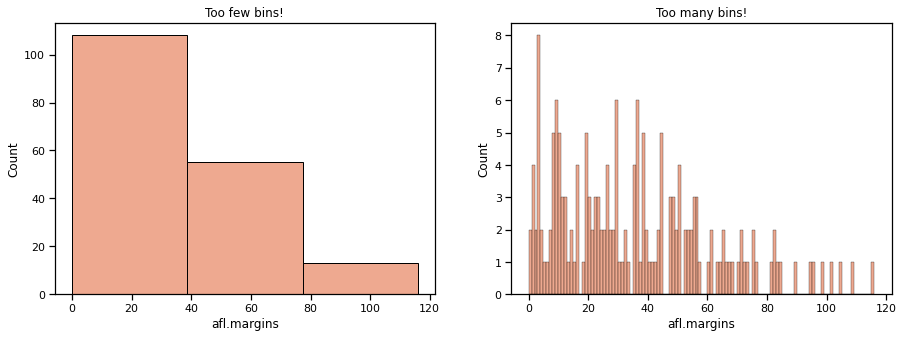

In [129]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.histplot(data = afl_margins, x="afl.margins", bins = 3, ax=axes[0])
ax2 = sns.histplot(data = afl_margins, x="afl.margins", bins = 116, ax=axes[1])

axes[0].set_title("Too few bins!")
axes[1].set_title("Too many bins!")


In the plot to the right, the bins are only 1 point wide. As a result, although the plot is very informative (it displays the entire data set with no loss of information at all!) the plot is very hard to interpret, and feels quite cluttered. On the other hand, the plot to the left has a bin width of 50 points, and has the opposite problem: it's very easy to "read" this plot, but it doesn't convey a lot of information. One gets the sense that this histogram is hiding too much. In short, the way in which you specify the number of bins has a big effect on what the histogram looks like, so it's important to make sure you choose the breaks sensibly. In general `seaborn` does a pretty good job of selecting the breaks on its own, but nevertheless it's usually a good idea to play around with the bins a bit to see what happens.

(boxplots)=
### Boxplots

A great alternative to histograms is the **_boxplot_**, sometimes called a "box and whiskers" plot. Like histograms, they're most suited to interval or ratio scale data. The idea behind a boxplot is to provide a simple visual depiction of the median, the interquartile range, and the range of the data. And because they do so in a fairly compact way, boxplots have become a very popular statistical graphic, especially during the exploratory stage of data analysis when you're trying to understand the data yourself. Let's have a look at how they work, again using the `afl_margins` data as our example. Firstly, let's actually calculate these numbers ourselves using the `describe()` function:

In [159]:
afl_margins.describe()

,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


So how does a boxplot capture these numbers? The easiest way to describe what a boxplot looks like is just to draw one. The function for doing this in `seaborn` is (surprise, surprise) `boxplot()`. As always there's a lot of optional arguments that you can specify if you want, but for the most part you can just let R choose the defaults for you. That said, I'm going to override one of the defaults to start with by specifying the `range` option, but for the most part you won't want to do this (I'll explain why in a minute). With that as preamble, let's try the following command:

<AxesSubplot:ylabel='afl.margins'>

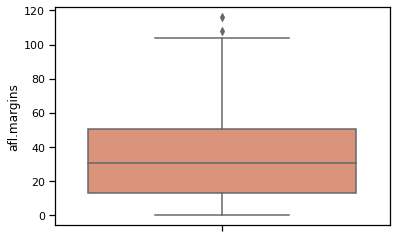

In [132]:
sns.boxplot(data = afl_margins, y = 'afl.margins')

When you look at this plot, this is how you should interpret it: the line in the middle of the box is the median; the box itself spans the range from the 25th percentile to the 75th percentile, and the "whiskers" extend to 1.5 times the interquartile range. The two points above the top whisker represent "extreme values", that is, points that fall outside the range of the whiskers.

One small note on the code above: since we are now drawing from data in a dataframe, rather then simply using lists as our data, like we did for the first scatterplots with the `fibonacci` data, there are two changes to the way we tell `seaborn` to make a plot. First, we specify the dataframe that stores the data by writing `data = afl_margins`. Second, we told `seaborn` which column in `afl_margins` to look in for the data by using the name of the column in quotes: `y = 'afl.margins'`. 

In the example above, we made a vertical boxplot, which in this case resulted in a fairly squat-looking boxplot. As an alternative, we could display the data on the x-axis instead, which will result in a horizontal boxplot.

<AxesSubplot:xlabel='afl.margins'>

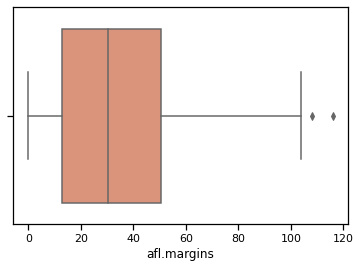

In [133]:
sns.boxplot(data = afl_margins, x = 'afl.margins')

Because the boxplot automatically (unless you change the range argument) separates out those observations that lie within a certain range, people often use them as an informal method for detecting outliers: observations that are “suspiciously” distant from the rest of the data. Here’s an example. Suppose that I’d drawn the boxplot for the AFL margins data, and it came up looking like the one below. It’s pretty clear that something funny is going on with one of the observations. Apparently, there was one game in which the margin was over 300 points! That doesn’t sound right to me. Now that I’ve become suspicious, it’s time to look a bit more closely at the data.

<AxesSubplot:xlabel='afl.margins'>

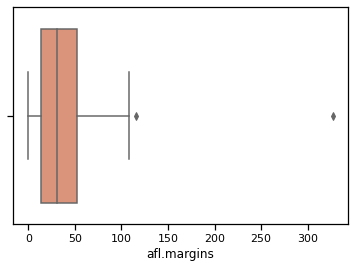

In [160]:
afl_margins.loc[177] = 327
sns.boxplot(data = afl_margins, x = 'afl.margins')

In [161]:
afl_margins[afl_margins['afl.margins'] > 300]

,afl.margins
177,327


Aha! Game 177 had a margin of 327. Now, in this case this should come as no surprise to me, since I added this data point myself with the code `afl_margins.loc[177] = 327` above. But if we play along for a minute, then a game with a margin of 327 definitely doesn't sound right. So then I go back to the original data source (the internet!) and I discover that the actual margin of that game was 33 points. Now it's pretty clear what happened. Someone must have typed in the wrong number. Easily fixed, just by typing `afl_margins.loc[177] = 33`.   While this might seem like a silly example, I should stress that this kind of thing actually happens a lot. Real world data sets are often riddled with stupid errors, especially when someone had to type something into a computer at some point. In fact, there's actually a name for this phase of data analysis, since in practice it can waste a huge chunk of our time: **_data cleaning_**. It involves searching for typos, missing data and all sorts of other obnoxious errors in raw data files.